# 因果中介分析

### 黄荣贵（复旦大学社会学系）

In [1]:
library(mediation)

Loading required package: MASS

Loading required package: Matrix

Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




### 结果变量与中介变量均为连续变量（线性模型）


中介模型：treat -> job_seek -> depress

对中介变量建模

In [2]:
data(jobs)
fit.med <- lm(job_seek ~ treat + econ_hard + sex + age, data=jobs)

summary(fit.med)


Call:
lm(formula = job_seek ~ treat + econ_hard + sex + age, data = jobs)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1658 -0.4092  0.0577  0.5819  1.1121 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.670585   0.125169  29.325   <2e-16 ***
treat        0.065615   0.051472   1.275   0.2027    
econ_hard    0.053162   0.024598   2.161   0.0309 *  
sex         -0.007637   0.048725  -0.157   0.8755    
age          0.004586   0.002319   1.978   0.0482 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7259 on 894 degrees of freedom
Multiple R-squared:  0.01147,	Adjusted R-squared:  0.007048 
F-statistic: 2.593 on 4 and 894 DF,  p-value: 0.03529


对因变量建模

In [3]:
fit.y <- lm(depress2 ~ treat + job_seek + econ_hard + sex + age, data=jobs)


summary(fit.y)


Call:
lm(formula = depress2 ~ treat + job_seek + econ_hard + sex + 
    age, data = jobs)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5192 -0.4461 -0.1503  0.3597  2.7568 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.2076414  0.1480548  14.911  < 2e-16 ***
treat       -0.0402647  0.0435059  -0.926   0.3550    
job_seek    -0.2399550  0.0282433  -8.496  < 2e-16 ***
econ_hard    0.1485434  0.0208269   7.132 2.04e-12 ***
sex          0.1068049  0.0411471   2.596   0.0096 ** 
age          0.0006489  0.0019625   0.331   0.7410    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.613 on 893 degrees of freedom
Multiple R-squared:  0.1203,	Adjusted R-squared:  0.1154 
F-statistic: 24.43 on 5 and 893 DF,  p-value: < 2.2e-16


中介分析

In [4]:
contcont <- mediate(fit.med, fit.y, sims=500, treat="treat", mediator="job_seek")

summary(contcont)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value
ACME            -0.0168      -0.0402         0.01    0.16
ADE             -0.0376      -0.1205         0.04    0.41
Total Effect    -0.0545      -0.1469         0.03    0.24
Prop. Mediated   0.2441      -3.5394         1.92    0.30

Sample Size Used: 899 


Simulations: 500 


* ACME: average causal mediation effect
* ADE: average direct effect 



对中介分析结果可视化

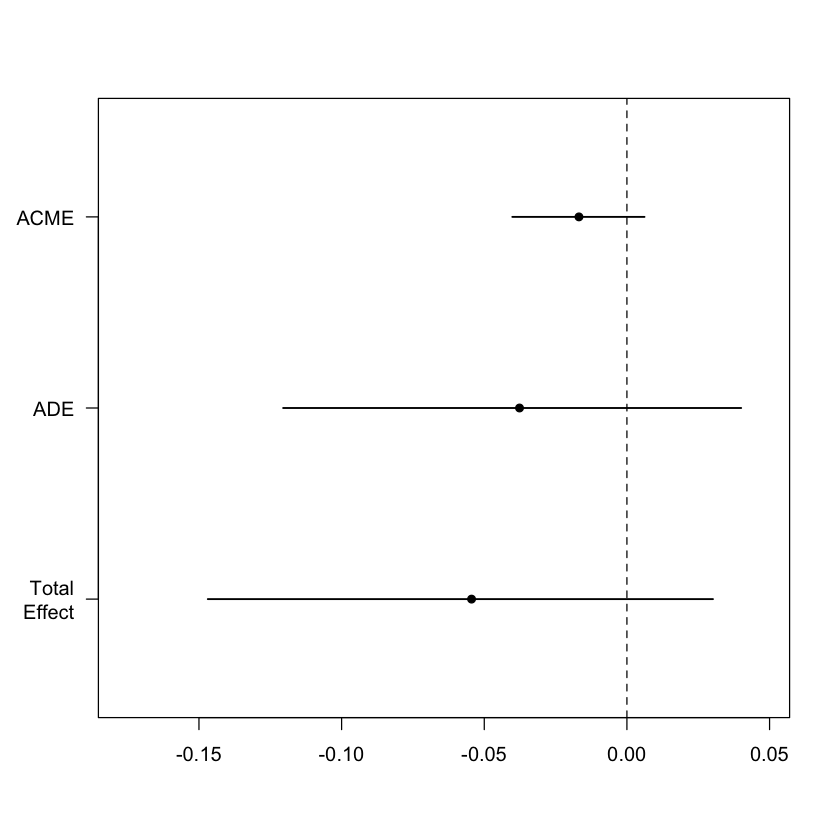

In [5]:
plot(contcont)

使用bootstrap法计算

In [6]:
contcont_boot <- mediate(fit.med, fit.y, sims=1000, treat="treat", mediator="job_seek", boot=TRUE)

summary(contcont_boot)

Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value
ACME            -0.0157      -0.0417         0.01    0.18
ADE             -0.0403      -0.1256         0.05    0.36
Total Effect    -0.0560      -0.1446         0.03    0.23
Prop. Mediated   0.2811      -1.9092         2.16    0.34

Sample Size Used: 899 


Simulations: 1000 


### 结果变量与中介变量均为连续变量，在结果变量模型中中介变量与处理变量之间存在交互效应


In [7]:
fit.med <- lm(job_seek ~ treat + econ_hard + sex + age, data=jobs)
fit.y.inter <- lm(depress2 ~ treat + job_seek + treat:job_seek + econ_hard + sex + age, data=jobs)

contcont.inter <- mediate(fit.med, fit.y.inter, sims=200, treat="treat", mediator="job_seek")
summary(contcont.inter)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                         Estimate 95% CI Lower 95% CI Upper p-value
ACME (control)            -0.0200      -0.0551         0.01    0.21
ACME (treated)            -0.0140      -0.0393         0.01    0.21
ADE (control)             -0.0438      -0.1401         0.04    0.32
ADE (treated)             -0.0378      -0.1247         0.05    0.38
Total Effect              -0.0578      -0.1571         0.03    0.22
Prop. Mediated (control)   0.2871      -1.4091         2.82    0.37
Prop. Mediated (treated)   0.2037      -1.2151         2.06    0.37
ACME (average)            -0.0170      -0.0460         0.01    0.21
ADE (average)             -0.0408      -0.1280         0.04    0.36
Prop. Mediated (average)   0.2454      -1.2888         2.14    0.37

Sample Size Used: 899 


Simulations: 200 


当中介变量与处理变量之间存在交互效应，意味着中介效应在处理组和控制组之间存在差异（因为中介变量对结果的效应存在组间差异），因此结果给出两个组别的ACME和ADE。此外，还计算了平均的ACME和ADE。

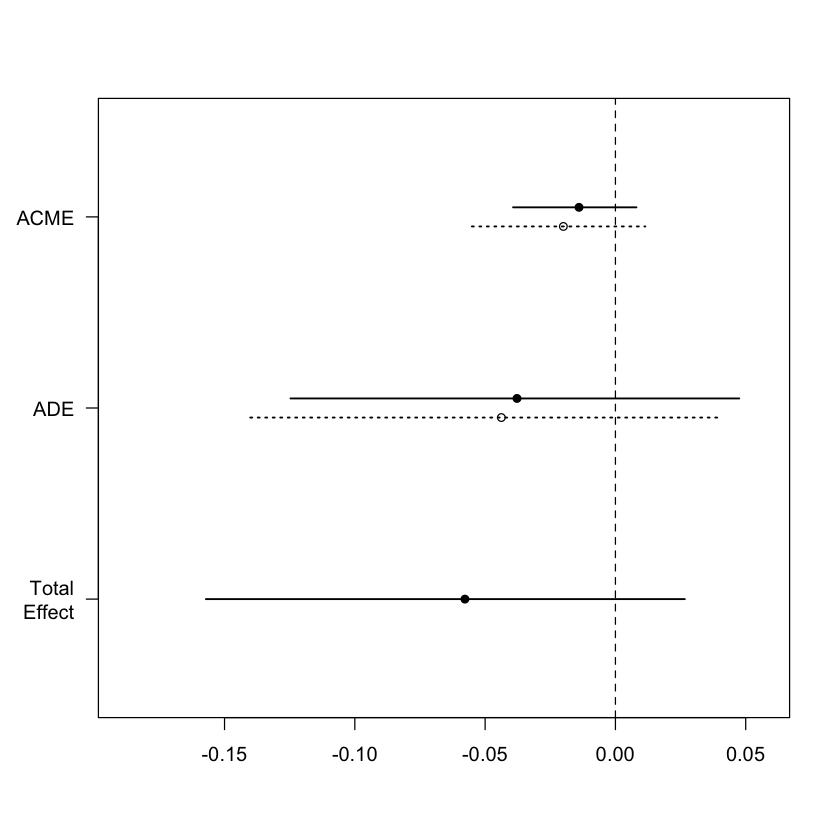

In [8]:
plot(contcont.inter)

### 结果变量与中介变量均为连续变量，存在调节的中介效应（本例子中条件变量为age）

In [9]:
fit.med.moderated <- lm(job_seek ~ treat*age + econ_hard + sex, data=jobs)
fit.y.moderated <- lm(depress2 ~ treat*job_seek*age + econ_hard + sex, data=jobs)

In [10]:
summary(fit.med.moderated)


Call:
lm(formula = job_seek ~ treat * age + econ_hard + sex, data = jobs)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.13745 -0.40634  0.05482  0.57953  1.14216 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.584225   0.173165  20.698   <2e-16 ***
treat        0.197117   0.189293   1.041   0.2980    
age          0.006873   0.003926   1.751   0.0803 .  
econ_hard    0.053626   0.024613   2.179   0.0296 *  
sex         -0.008273   0.048746  -0.170   0.8653    
treat:age   -0.003513   0.004866  -0.722   0.4705    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7261 on 893 degrees of freedom
Multiple R-squared:  0.01205,	Adjusted R-squared:  0.006515 
F-statistic: 2.178 on 5 and 893 DF,  p-value: 0.05461


In [11]:
summary(fit.y.moderated)


Call:
lm(formula = depress2 ~ treat * job_seek * age + econ_hard + 
    sex, data = jobs)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4283 -0.4416 -0.1527  0.3499  2.7345 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.5435116  0.7935790   3.205   0.0014 ** 
treat              -0.4708853  0.9191636  -0.512   0.6086    
job_seek           -0.3328300  0.1962079  -1.696   0.0902 .  
age                -0.0018819  0.0212449  -0.089   0.9294    
econ_hard           0.1502734  0.0209177   7.184 1.43e-12 ***
sex                 0.1063474  0.0413040   2.575   0.0102 *  
treat:job_seek      0.1177309  0.2276188   0.517   0.6051    
treat:age           0.0020657  0.0245942   0.084   0.9331    
job_seek:age        0.0008331  0.0052212   0.160   0.8733    
treat:job_seek:age -0.0007925  0.0060472  -0.131   0.8958    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6136 on 889 degrees of 

In [12]:
contcont.age20 <- mediate(fit.med.moderated, fit.y.moderated, sims=300, treat="treat", mediator="job_seek", 
                          covariates = list(age = 20))
summary(contcont.age20)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

(Inference Conditional on the Covariate Values Specified in `covariates')

                         Estimate 95% CI Lower 95% CI Upper p-value
ACME (control)            -0.0390      -0.1046         0.02    0.19
ACME (treated)            -0.0270      -0.0792         0.01    0.19
ADE (control)             -0.0308      -0.1852         0.12    0.65
ADE (treated)             -0.0188      -0.1633         0.13    0.83
Total Effect              -0.0579      -0.2129         0.10    0.49
Prop. Mediated (control)   0.3265      -4.5539         6.53    0.50
Prop. Mediated (treated)   0.2469      -2.4651         3.99    0.50
ACME (average)            -0.0330      -0.0851         0.02    0.19
ADE (average)             -0.0248      -0.1744         0.12    0.73
Prop. Mediated (average)   0.2867      -3.5479         5.68    0.50

Sample Size Used: 899 


Simulations: 300 


上述结果表示，当age等于20时的中介效应。

In [13]:
contcont.age70 <- mediate(fit.med.moderated, fit.y.moderated, sims=300, treat="treat", mediator="job_seek", 
                          covariates = list(age = 20))
summary(contcont.age70)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

(Inference Conditional on the Covariate Values Specified in `covariates')

                         Estimate 95% CI Lower 95% CI Upper p-value
ACME (control)            -0.0398      -0.1166         0.02    0.17
ACME (treated)            -0.0285      -0.0826         0.01    0.17
ADE (control)             -0.0414      -0.2091         0.13    0.62
ADE (treated)             -0.0301      -0.2023         0.14    0.76
Total Effect              -0.0699      -0.2590         0.12    0.45
Prop. Mediated (control)   0.3062      -5.6696         5.14    0.47
Prop. Mediated (treated)   0.2084      -3.8629         3.52    0.47
ACME (average)            -0.0342      -0.0891         0.02    0.17
ADE (average)             -0.0358      -0.2082         0.13    0.67
Prop. Mediated (average)   0.2573      -4.9299         3.88    0.47

Sample Size Used: 899 


Simulations: 300 


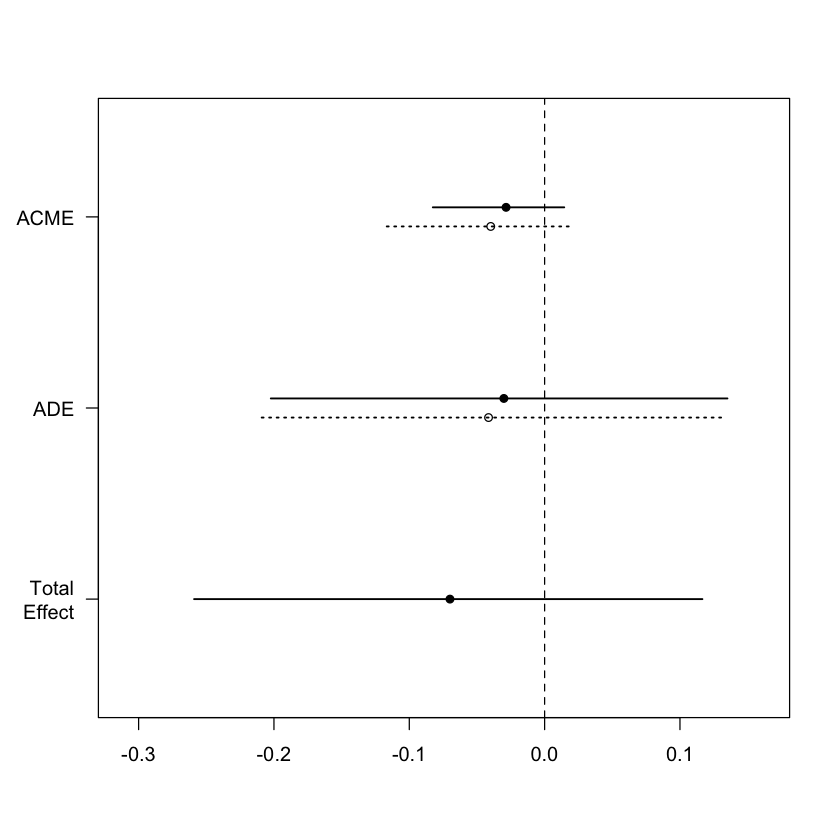

In [14]:
plot(contcont.age70)

上述结果表示，当age等于70时的中介效应。

### 连续的处理变量

In [15]:
jobs$treat_cont <- jobs$treat + rnorm(nrow(jobs))  # 创建一个假想的连续处理变量

m.contT <- lm(job_seek ~ treat_cont + econ_hard + sex + age, data=jobs)
y.contT <- lm(depress2 ~ treat_cont + job_seek + econ_hard + sex + age, data=jobs)

contcont.cont <- mediate(m.contT, y.contT, sims=300, treat="treat_cont", mediator="job_seek",
                    treat.value = 4, control.value = -2)

summary(contcont.cont)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value
ACME            -0.0063      -0.0681         0.05    0.83
ADE              0.0238      -0.1771         0.21    0.85
Total Effect     0.0175      -0.1975         0.21    0.88
Prop. Mediated   0.0501      -2.3699         3.98    0.87

Sample Size Used: 899 


Simulations: 300 


当处理变量从-2（control.value）变成4（treat.value）时带来的中介效应。

### 连续型结果变量（线性模型）+二分类中介变量（probit模型）

In [16]:
data(framing)

med.fit.2 <- lm(emo ~ treat + age + educ + gender + income, data = framing)

summary(med.fit.2)


Call:
lm(formula = emo ~ treat + age + educ + gender + income, data = framing)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8497 -2.0894 -0.3463  1.6848  6.5884 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      8.672206   0.884821   9.801  < 2e-16 ***
treat                            1.338611   0.359771   3.721 0.000244 ***
age                              0.002068   0.010002   0.207 0.836348    
educhigh school                 -1.041287   0.633509  -1.644 0.101465    
educsome college                -1.813070   0.664200  -2.730 0.006777 ** 
educbachelor's degree or higher -3.047092   0.659758  -4.618 6.11e-06 ***
genderfemale                     0.070310   0.314139   0.224 0.823078    
income                          -0.035474   0.041657  -0.852 0.395244    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.532 on 257 degrees of freedom
Multiple R-squared: 

In [17]:
out.fit.2 <- glm(cong_mesg ~ emo + treat + age + educ + gender + income,data = framing, family = binomial("probit"))

summary(out.fit.2)


Call:
glm(formula = cong_mesg ~ emo + treat + age + educ + gender + 
    income, family = binomial("probit"), data = framing)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8789  -0.8301  -0.5019   0.9614   2.1965  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -2.608086   0.609298  -4.280 1.86e-05 ***
emo                              0.206174   0.036314   5.678 1.37e-08 ***
treat                            0.039529   0.202165   0.196  0.84498    
age                              0.005560   0.005525   1.006  0.31430    
educhigh school                 -0.197283   0.336930  -0.586  0.55819    
educsome college                -0.590008   0.363385  -1.624  0.10445    
educbachelor's degree or higher -0.367425   0.369757  -0.994  0.32037    
genderfemale                    -0.396000   0.175277  -2.259  0.02387 *  
income                           0.084041   0.025572   3.286  0.00101 ** 
---


In [18]:
med.out.2 <- mediate(med.fit.2, out.fit.2, treat = "treat", mediator = "emo", robustSE = TRUE, sims = 100)

summary(med.out.2)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                         Estimate 95% CI Lower 95% CI Upper p-value    
ACME (control)            0.08355      0.03019         0.13  <2e-16 ***
ACME (treated)            0.08376      0.03129         0.13  <2e-16 ***
ADE (control)             0.01134     -0.08839         0.11    0.94    
ADE (treated)             0.01155     -0.10178         0.12    0.94    
Total Effect              0.09510     -0.00718         0.22    0.08 .  
Prop. Mediated (control)  0.84316     -1.45677        13.54    0.08 .  
Prop. Mediated (treated)  0.85543     -1.30207        12.22    0.08 .  
ACME (average)            0.08365      0.03074         0.13  <2e-16 ***
ADE (average)             0.01145     -0.09509         0.12    0.94    
Prop. Mediated (average)  0.84930     -1.37942        12.88    0.08 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 265 


Simulations: 100 


In [19]:
summary(med.out.2)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

                         Estimate 95% CI Lower 95% CI Upper p-value    
ACME (control)            0.08355      0.03019         0.13  <2e-16 ***
ACME (treated)            0.08376      0.03129         0.13  <2e-16 ***
ADE (control)             0.01134     -0.08839         0.11    0.94    
ADE (treated)             0.01155     -0.10178         0.12    0.94    
Total Effect              0.09510     -0.00718         0.22    0.08 .  
Prop. Mediated (control)  0.84316     -1.45677        13.54    0.08 .  
Prop. Mediated (treated)  0.85543     -1.30207        12.22    0.08 .  
ACME (average)            0.08365      0.03074         0.13  <2e-16 ***
ADE (average)             0.01145     -0.09509         0.12    0.94    
Prop. Mediated (average)  0.84930     -1.37942        12.88    0.08 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 265 


Simulations: 100 


### 延伸阅读

In [20]:
vignette("mediation", package="mediation")